In [1]:
import os
os.listdir('data')

['elected_reps_annotated.txt',
 'location_distribution.txt',
 'location_distribution_top.txt',
 'nationality_distributions.txt',
 'profession.txt',
 'religion.txt']

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import re

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='SKsaqlain',api_key='4aQeHDqR85H7d8POxmmR')

In [3]:
filename='data/location_distribution_top.txt'
def process_data(filename):
    #processing data and converting it into dataFrame
    f=open(filename,'r',encoding='utf-8')
    data=f.readlines()
    #print(data)

    data_processed=[]
    for ele in data:
        #spliting data on white space and removing leading and ending whitespace and newline.
        x=re.split('\s',ele.strip(" \n"))
        #typecasting string number  to interger.
        x[0]=int(x[0])
        #preprocess
        #joining words 
        if(len(x)>2):    
            temp=' '.join(x[1:])
            x[1]=temp
        data_processed.append(x)
    #sorting the data in descending order
    data_processed.sort(key=lambda x:-x[0])
    x_axis=[ele[1] for ele in data_processed]
    y_axis=[ele[0] for ele in data_processed]

    new_data=pd.DataFrame({'variable':x_axis,
                        'frequency':y_axis,})
    f.close()
    return new_data

data=process_data(filename)


In [4]:
data.head()

,variable,frequency
0,U.S.,636
1,United States,525
2,California,304
3,Europe,240
4,Florida,232


In [5]:
d=[go.Bar(x=data.variable,y=data.frequency)]
py.iplot(d,filename='jupyter')

In [6]:
import plotly.figure_factory as ff

#KDE is used to plot the distribution of the histogram.
hist_data=[data['frequency']]
group_labels=['distribution plot']

fig=ff.create_distplot(hist_data,group_labels)
py.iplot(fig)

In [7]:
'''
from scipy.stats import norm
import matplotlib.pyplot as plt
x_d=np.linspace(min(data.frequency),max(data.frequency),10)
density=sum(norm(xi).pdf(x_d) for xi in data.frequency)
plt.fill_between(x_d,density,alpha=0.5)
plt.plot(data.frequency,np.full_like(data.frequency,-0.1),'|k',markeredgewidth=1)
plt.axis([min(data.frequency),max(data.frequency),-0.2,100])
plt.show()
'''

"\nfrom scipy.stats import norm\nimport matplotlib.pyplot as plt\nx_d=np.linspace(min(data.frequency),max(data.frequency),10)\ndensity=sum(norm(xi).pdf(x_d) for xi in data.frequency)\nplt.fill_between(x_d,density,alpha=0.5)\nplt.plot(data.frequency,np.full_like(data.frequency,-0.1),'|k',markeredgewidth=1)\nplt.axis([min(data.frequency),max(data.frequency),-0.2,100])\nplt.show()\n"

In [8]:
# import plotly.figure_factory as ff

# #KDE is used to plot the distribution of the histogram.
# hist_data=[[3]*10]
# group_labels=['distribution plot']

# fig=ff.create_distplot(hist_data,group_labels)
# py.iplot(fig)

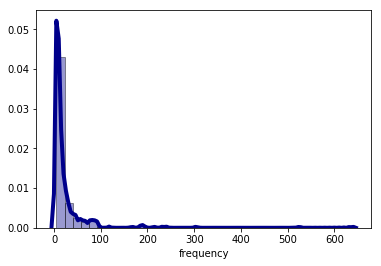

In [11]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['frequency'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [12]:
filename1='data/location_distribution_top.txt'
filename2='data/profession.txt'

data1=process_data(filename1)
data2=process_data(filename2)
data_trace=[]
data_trace.append(go.Bar(x=data1.variable,y=data1['frequency'],name=filename1))
data_trace.append(go.Bar(x=data2.variable,y=data2['frequency'],name=filename2))
py.iplot(data_trace,filename='bar chart')

In [13]:
import plotly.figure_factory as ff

#KDE is used to plot the distribution of the histogram.
hist_data=[data1['frequency'],data2['frequency']]
group_labels=[filename1,filename2]

fig=ff.create_distplot(hist_data,group_labels)
py.iplot(fig)

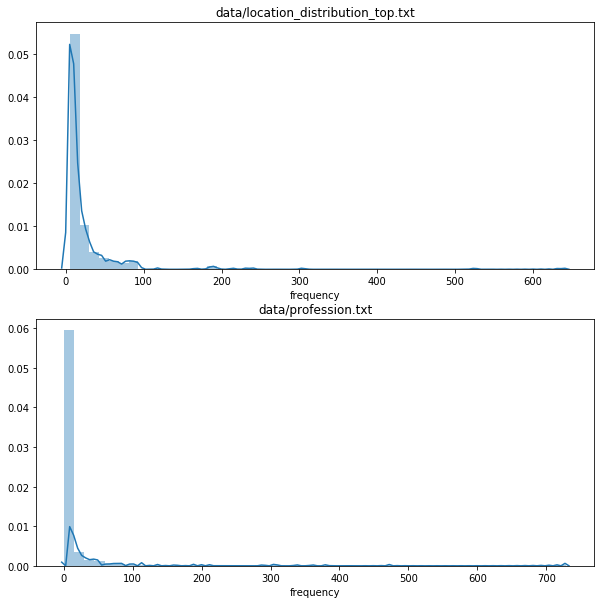

In [14]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
number_of_variables=2
grid_size=number_of_variables//2
f, axes = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(data1['frequency'], hist=True, kde=True,ax=axes[0]).set_title(filename1)
sns.distplot(data2['frequency'], hist=True, kde=True,ax=axes[1]).set_title(filename2)
plt.show()

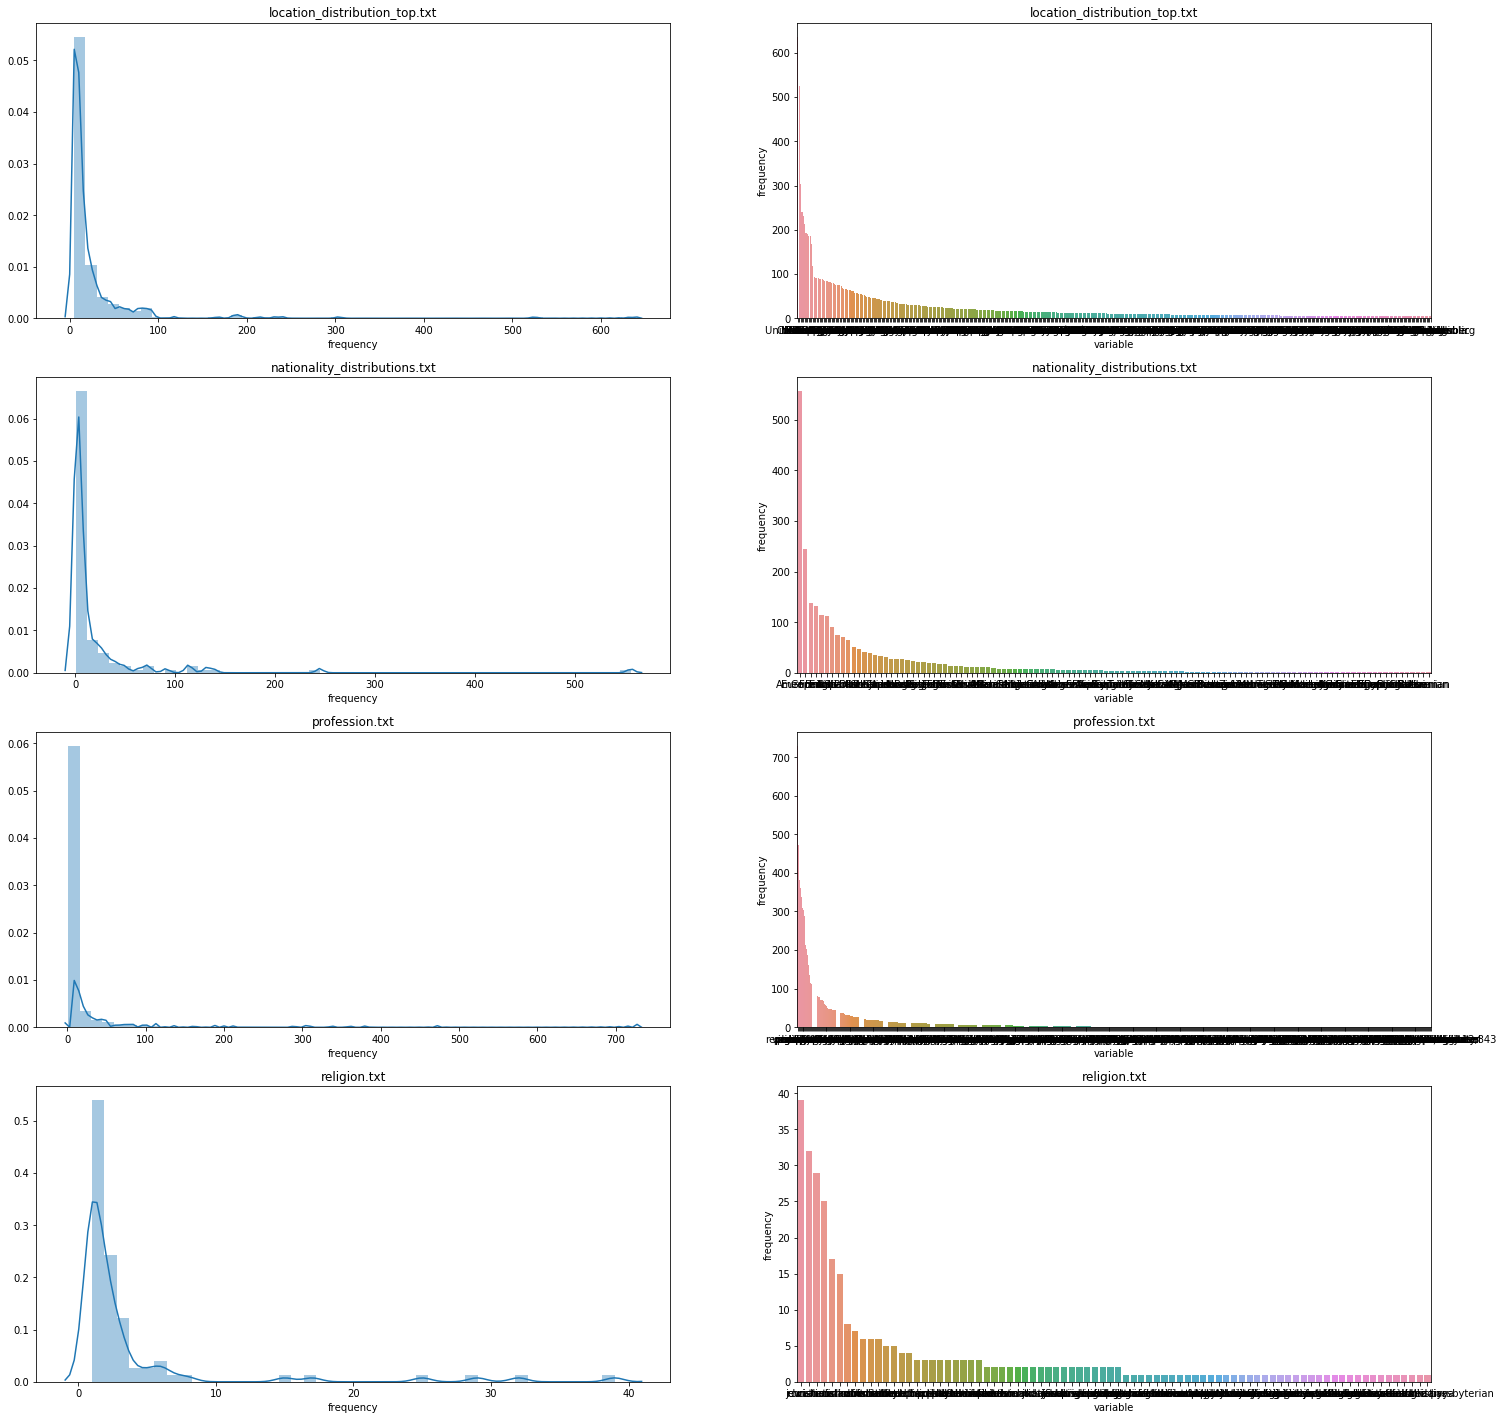

In [15]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
files=['location_distribution_top.txt',
 'nationality_distributions.txt',
 'profession.txt',
 'religion.txt']
data=dict()
for ele in files:
    data[ele]=process_data("data/"+ele)
number_of_variables=len(files)
f, axes = plt.subplots(nrows=len(files),ncols=2,figsize=(25,25))

for i,ele in enumerate(data.keys()):
    sns.distplot(data[ele]['frequency'], hist=True, kde=True,ax=axes[i,0]).set_title(ele)
    sns.barplot(x='variable',y='frequency',data=data[ele],ax=axes[i,1]).set_title(ele)
    
plt.show()